# King County Housing Linear Regression Project


* Student name: Seyma Tas
* Student pace:  Full time
* Scheduled project review date/time: 05-04-2020
* Instructor name: Amber Yandow
* Blog post URL:


## OSEMN Approach
1 - Obtaining the data 2 - Scrubbing the data 3 - Exploring the data 4 - Modeling the data 5 - iNterpreting the results


![title](picture2.png)


## Questions:

1) What are the main factors to predict the price of a house?

2) How much does a middle income family should invest to buy a standard house?
   
   or What are the properties of a house you can buy in King County if your budget is $400,000???
    
3) How can a middle income family increase the price of their house by %20 by spending %5 of the house cost???

4) Basement
 

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
# # Print all the interactive output without resorting to print
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

## Import the necessary packages

First, we’ll import all of our necessary packages.

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
# import sklearn as sk 
from statsmodels.formula.api import ols


In [4]:
# ## Display more information 
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

## Import the data set

Next, we’ll import our data and see what we’re working with. 

In [5]:
df=pd.read_csv('kc_house_data.csv')

Lets see what the data looks like by functions head(), tail(), shape(), info() and describe().

In [6]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

### Drop unnecaessary columns

In [7]:
df=df.drop(['id','date'],axis=1)

# Scraping and cleaning data

In [8]:
df.shape

(21597, 19)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(1)
memory usage: 3.1+ MB


### Numerical Data Stored as Strings

In [10]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
283.0         1
946.0         1
2130.0        1
248.0         1
1852.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [11]:
df['sqft_basement']=df['sqft_basement'].map(lambda x:float(x.replace('?', '0')))


In [12]:
#Replace 0 with difference between sqft_above and sqft_living
df['sqft_basement'].replace(to_replace='0', value = abs(df['sqft_living']-df['sqft_above']), inplace=True)


In [13]:
df['bedrooms'].replace(to_replace='33', value = 3, inplace=True)


In [14]:
df.describe().round(1)

price  bedrooms  bathrooms  sqft_living   sqft_lot   floors  \
count    21597.0   21597.0    21597.0      21597.0    21597.0  21597.0   
mean    540296.6       3.4        2.1       2080.3    15099.4      1.5   
std     367368.1       0.9        0.8        918.1    41412.6      0.5   
min      78000.0       1.0        0.5        370.0      520.0      1.0   
25%     322000.0       3.0        1.8       1430.0     5040.0      1.0   
50%     450000.0       3.0        2.2       1910.0     7618.0      1.5   
75%     645000.0       4.0        2.5       2550.0    10685.0      2.0   
max    7700000.0      33.0        8.0      13540.0  1651359.0      3.5   

       waterfront     view  condition    grade  sqft_above  sqft_basement  \
count     19221.0  21534.0    21597.0  21597.0     21597.0        21597.0   
mean          0.0      0.2        3.4      7.7      1788.6          285.7   
std           0.1      0.8        0.7      1.2       827.8          439.8   
min           0.0      0.0        1.0      3.0       370.0            0.0   
25%           0.0      0.0        3.0      7.0      1190.0            0.0   
50%           0.0      0.0        3.0      7.0      1560.0            0.0   
75%           0.0      0.0        4.0      8.0      2210.0          550.0   
max           1.0      4.0        5.0     13.0      9410.0         4820.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
count   21597.0       17755.0  21597.0  21597.0  21597.0        21597.0   
mean     1971.0          83.6  98078.0     47.6   -122.2         1986.6   
std        29.4         399.9     53.5      0.1      0.1          685.2   
min      1900.0           0.0  98001.0     47.2   -122.5          399.0   
25%      1951.0           0.0  98033.0     47.5   -122.3         1490.0   
50%      1975.0           0.0  98065.0     47.6   -122.2         1840.0   
75%      1997.0           0.0  98118.0     47.7   -122.1         2360.0   
max      2015.0        2015.0  98199.0     47.8   -121.3         6210.0   

       sqft_lot15  
count     21597.0  
mean      12758.3  
std       27274.4  
min         651.0  
25%        5100.0  
50%        7620.0  
75%       10083.0  
max      871200.0

### Buraya describe ile ilgili yorum yaz
Most houses were build around 1975; sold for $450K; had square footage of living spaces around 1910. You can also note, that distributions of price and variables such as sqft_lot are skewed to the upper tail.



## Detecting and Dealing With Null Values

In [15]:
print(df.isna().sum())

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


### Buraya na values  ile ilgili yorum yaz


# waterfront ve view 

In [16]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [17]:
df['view'].isna().sum()

63

In [18]:
feats = ['view', 'waterfront']
df[feats].corr()

view  waterfront
view        1.000000    0.406654
waterfront  0.406654    1.000000

In [19]:
print('Number missing both:',
      len(df[(df.view.isnull())
      & (df.waterfront.isnull())]))

Number missing both: 6


In [20]:
len(df[(df.view==2)&(df.waterfront.isna())])

121

In [21]:
len(df[(df.view==3)&(df.waterfront>0)])

14

In [22]:
df['view'].fillna(0,inplace=True)

In [23]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [24]:
df['waterfront'].isna().sum()

2376

In [25]:
df['waterfront'].fillna(0,inplace=True)

In [26]:
feats = ['view', 'waterfront']
df[feats].corr()

view  waterfront
view        1.000000    0.380543
waterfront  0.380543    1.000000

In [27]:
df.yr_renovated.fillna(0, inplace=True)

### Outliers

In [28]:
Q1 = df.quantile(0.005)
Q3 = df.quantile(0.98)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

## Normalizing the data

In [29]:
def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in ['bathrooms', 'sqft_living', 
       'sqft_lot','sqft_above', 'sqft_basement', 'yr_built','yr_renovated','sqft_living15', 'sqft_lot15']:
    df[feat] = norm_feat(df[feat])


In [30]:
df.describe().round(2)

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
count    21222.00  21222.00   21222.00     21222.00  21222.00  21222.00   
mean    529101.13      3.37      -0.00        -0.00      0.00      1.49   
std     328315.38      0.90       1.00         1.00      1.00      0.54   
min      78000.00      1.00      -2.12        -1.91     -0.55      1.00   
25%     320000.00      3.00      -0.80        -0.72     -0.34      1.00   
50%     450000.00      3.00       0.19        -0.18     -0.22      1.50   
75%     637000.00      4.00       0.52         0.53     -0.08      2.00   
max    3710000.00     11.00       7.12         7.45     12.00      3.50   

       waterfront     view  condition     grade  sqft_above  sqft_basement  \
count     21222.0  21222.0   21222.00  21222.00    21222.00       21222.00   
mean          0.0      0.2       3.41      7.64       -0.00          -0.00   
std           0.0      0.7       0.65      1.15        1.00           1.00   
min           0.0      0.0       1.00      3.00       -1.74          -0.65   
25%           0.0      0.0       3.00      7.00       -0.72          -0.65   
50%           0.0      0.0       3.00      7.00       -0.28          -0.65   
75%           0.0      0.0       4.00      8.00        0.52           0.60   
max           0.0      4.0       5.00     13.00        7.73           6.90   

       yr_built  yr_renovated   zipcode       lat      long  sqft_living15  \
count  21222.00      21222.00  21222.00  21222.00  21222.00       21222.00   
mean       0.00          0.00  98078.23     47.56   -122.22          -0.00   
std        1.00          1.00     53.51      0.14      0.14           1.00   
min       -2.41         -0.19  98001.00     47.16   -122.52          -2.23   
25%       -0.68         -0.19  98033.00     47.47   -122.33          -0.73   
50%        0.14         -0.19  98065.00     47.57   -122.23          -0.22   
75%        0.89         -0.19  98118.00     47.68   -122.13           0.55   
max        1.50          5.44  98199.00     47.78   -121.32           6.23   

       sqft_lot15  
count    21222.00  
mean         0.00  
std          1.00  
min         -0.67  
25%         -0.37  
50%         -0.21  
75%         -0.05  
max         12.58

In [31]:
df.to_csv("king_county_dataset_cleaned.csv", index=False)


## One-Hot Encoding Categorical Columns


#### Identifying Categorical Variables

These columns can be thought as categorical values. Bedrooms, floors, waterfront, wiev, grade, zipcode and year renovated.
Let's explore them one by one.

In [32]:
df['bedrooms'] = df['bedrooms'].astype('category')
df['floors'] = df['floors'].astype('category')
df['waterfront'] = df['waterfront'].astype('category')
df['view'] = df['view'].astype('category')
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')


In [33]:
feats = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 
       'sqft_living15', 'sqft_lot15']
df_feats = df[feats]
df_feats = pd.get_dummies(df_feats, drop_first=True)

In [34]:
df_feats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21222 entries, 0 to 21596
Data columns (total 43 columns):
price            21222 non-null float64
bathrooms        21222 non-null float64
sqft_living      21222 non-null float64
sqft_lot         21222 non-null float64
sqft_above       21222 non-null float64
sqft_basement    21222 non-null float64
yr_built         21222 non-null float64
yr_renovated     21222 non-null float64
sqft_living15    21222 non-null float64
sqft_lot15       21222 non-null float64
bedrooms_2       21222 non-null uint8
bedrooms_3       21222 non-null uint8
bedrooms_4       21222 non-null uint8
bedrooms_5       21222 non-null uint8
bedrooms_6       21222 non-null uint8
bedrooms_7       21222 non-null uint8
bedrooms_8       21222 non-null uint8
bedrooms_9       21222 non-null uint8
bedrooms_10      21222 non-null uint8
bedrooms_11      21222 non-null uint8
floors_1.5       21222 non-null uint8
floors_2.0       21222 non-null uint8
floors_2.5       21222 non-null uin

In [35]:
df_feats.head()

price  bathrooms  sqft_living  sqft_lot  sqft_above  sqft_basement  \
0  221900.0  -1.461628    -0.994897 -0.306524   -0.735512      -0.654072   
1  538000.0   0.189443     0.572806 -0.231163    0.490470       0.273068   
2  180000.0  -1.461628    -1.457313 -0.100607   -1.243242      -0.654072   
3  604000.0   1.180085    -0.115179 -0.337293   -0.896500       1.455173   
4  510000.0  -0.140771    -0.430975 -0.191494   -0.116329      -0.654072   

   yr_built  yr_renovated  sqft_living15  sqft_lot15  ...  grade_4  grade_5  \
0 -0.541553     -0.185631      -0.938104   -0.333838  ...        0        0   
1 -0.677551      5.371656      -0.422627   -0.200633  ...        0        0   
2 -1.289539     -0.185631       1.094349   -0.172304  ...        0        0   
3 -0.201559     -0.185631      -0.908648   -0.377369  ...        0        0   
4  0.546427     -0.185631      -0.260620   -0.209741  ...        0        0   

   grade_6  grade_7  grade_8  grade_9  grade_10  grade_11  grade_12  grade_13  
0        0        1        0        0         0         0         0         0  
1        0        1        0        0         0         0         0         0  
2        1        0        0        0         0         0         0         0  
3        0        1        0        0         0         0         0         0  
4        0        0        1        0         0         0         0         0  

[5 rows x 43 columns]

'zipcode', 'lat', 'long',

# Exploring the data

In [36]:
df.head()

price bedrooms  bathrooms  sqft_living  sqft_lot floors waterfront view  \
0  221900.0        3  -1.461628    -0.994897 -0.306524    1.0        0.0  0.0   
1  538000.0        3   0.189443     0.572806 -0.231163    2.0        0.0  0.0   
2  180000.0        2  -1.461628    -1.457313 -0.100607    1.0        0.0  0.0   
3  604000.0        4   1.180085    -0.115179 -0.337293    1.0        0.0  0.0   
4  510000.0        3  -0.140771    -0.430975 -0.191494    1.0        0.0  0.0   

  condition grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  \
0         3     7   -0.735512      -0.654072 -0.541553     -0.185631    98178   
1         3     7    0.490470       0.273068 -0.677551      5.371656    98125   
2         3     6   -1.243242      -0.654072 -1.289539     -0.185631    98028   
3         5     7   -0.896500       1.455173 -0.201559     -0.185631    98136   
4         3     8   -0.116329      -0.654072  0.546427     -0.185631    98074   

       lat     long  sqft_living15  sqft_lot15  
0  47.5112 -122.257      -0.938104   -0.333838  
1  47.7210 -122.319      -0.422627   -0.200633  
2  47.7379 -122.233       1.094349   -0.172304  
3  47.5208 -122.393      -0.908648   -0.377369  
4  47.6168 -122.045      -0.260620   -0.209741

In [37]:
df_feats.head()

price  bathrooms  sqft_living  sqft_lot  sqft_above  sqft_basement  \
0  221900.0  -1.461628    -0.994897 -0.306524   -0.735512      -0.654072   
1  538000.0   0.189443     0.572806 -0.231163    0.490470       0.273068   
2  180000.0  -1.461628    -1.457313 -0.100607   -1.243242      -0.654072   
3  604000.0   1.180085    -0.115179 -0.337293   -0.896500       1.455173   
4  510000.0  -0.140771    -0.430975 -0.191494   -0.116329      -0.654072   

   yr_built  yr_renovated  sqft_living15  sqft_lot15  ...  grade_4  grade_5  \
0 -0.541553     -0.185631      -0.938104   -0.333838  ...        0        0   
1 -0.677551      5.371656      -0.422627   -0.200633  ...        0        0   
2 -1.289539     -0.185631       1.094349   -0.172304  ...        0        0   
3 -0.201559     -0.185631      -0.908648   -0.377369  ...        0        0   
4  0.546427     -0.185631      -0.260620   -0.209741  ...        0        0   

   grade_6  grade_7  grade_8  grade_9  grade_10  grade_11  grade_12  grade_13  
0        0        1        0        0         0         0         0         0  
1        0        1        0        0         0         0         0         0  
2        1        0        0        0         0         0         0         0  
3        0        1        0        0         0         0         0         0  
4        0        0        1        0         0         0         0         0  

[5 rows x 43 columns]

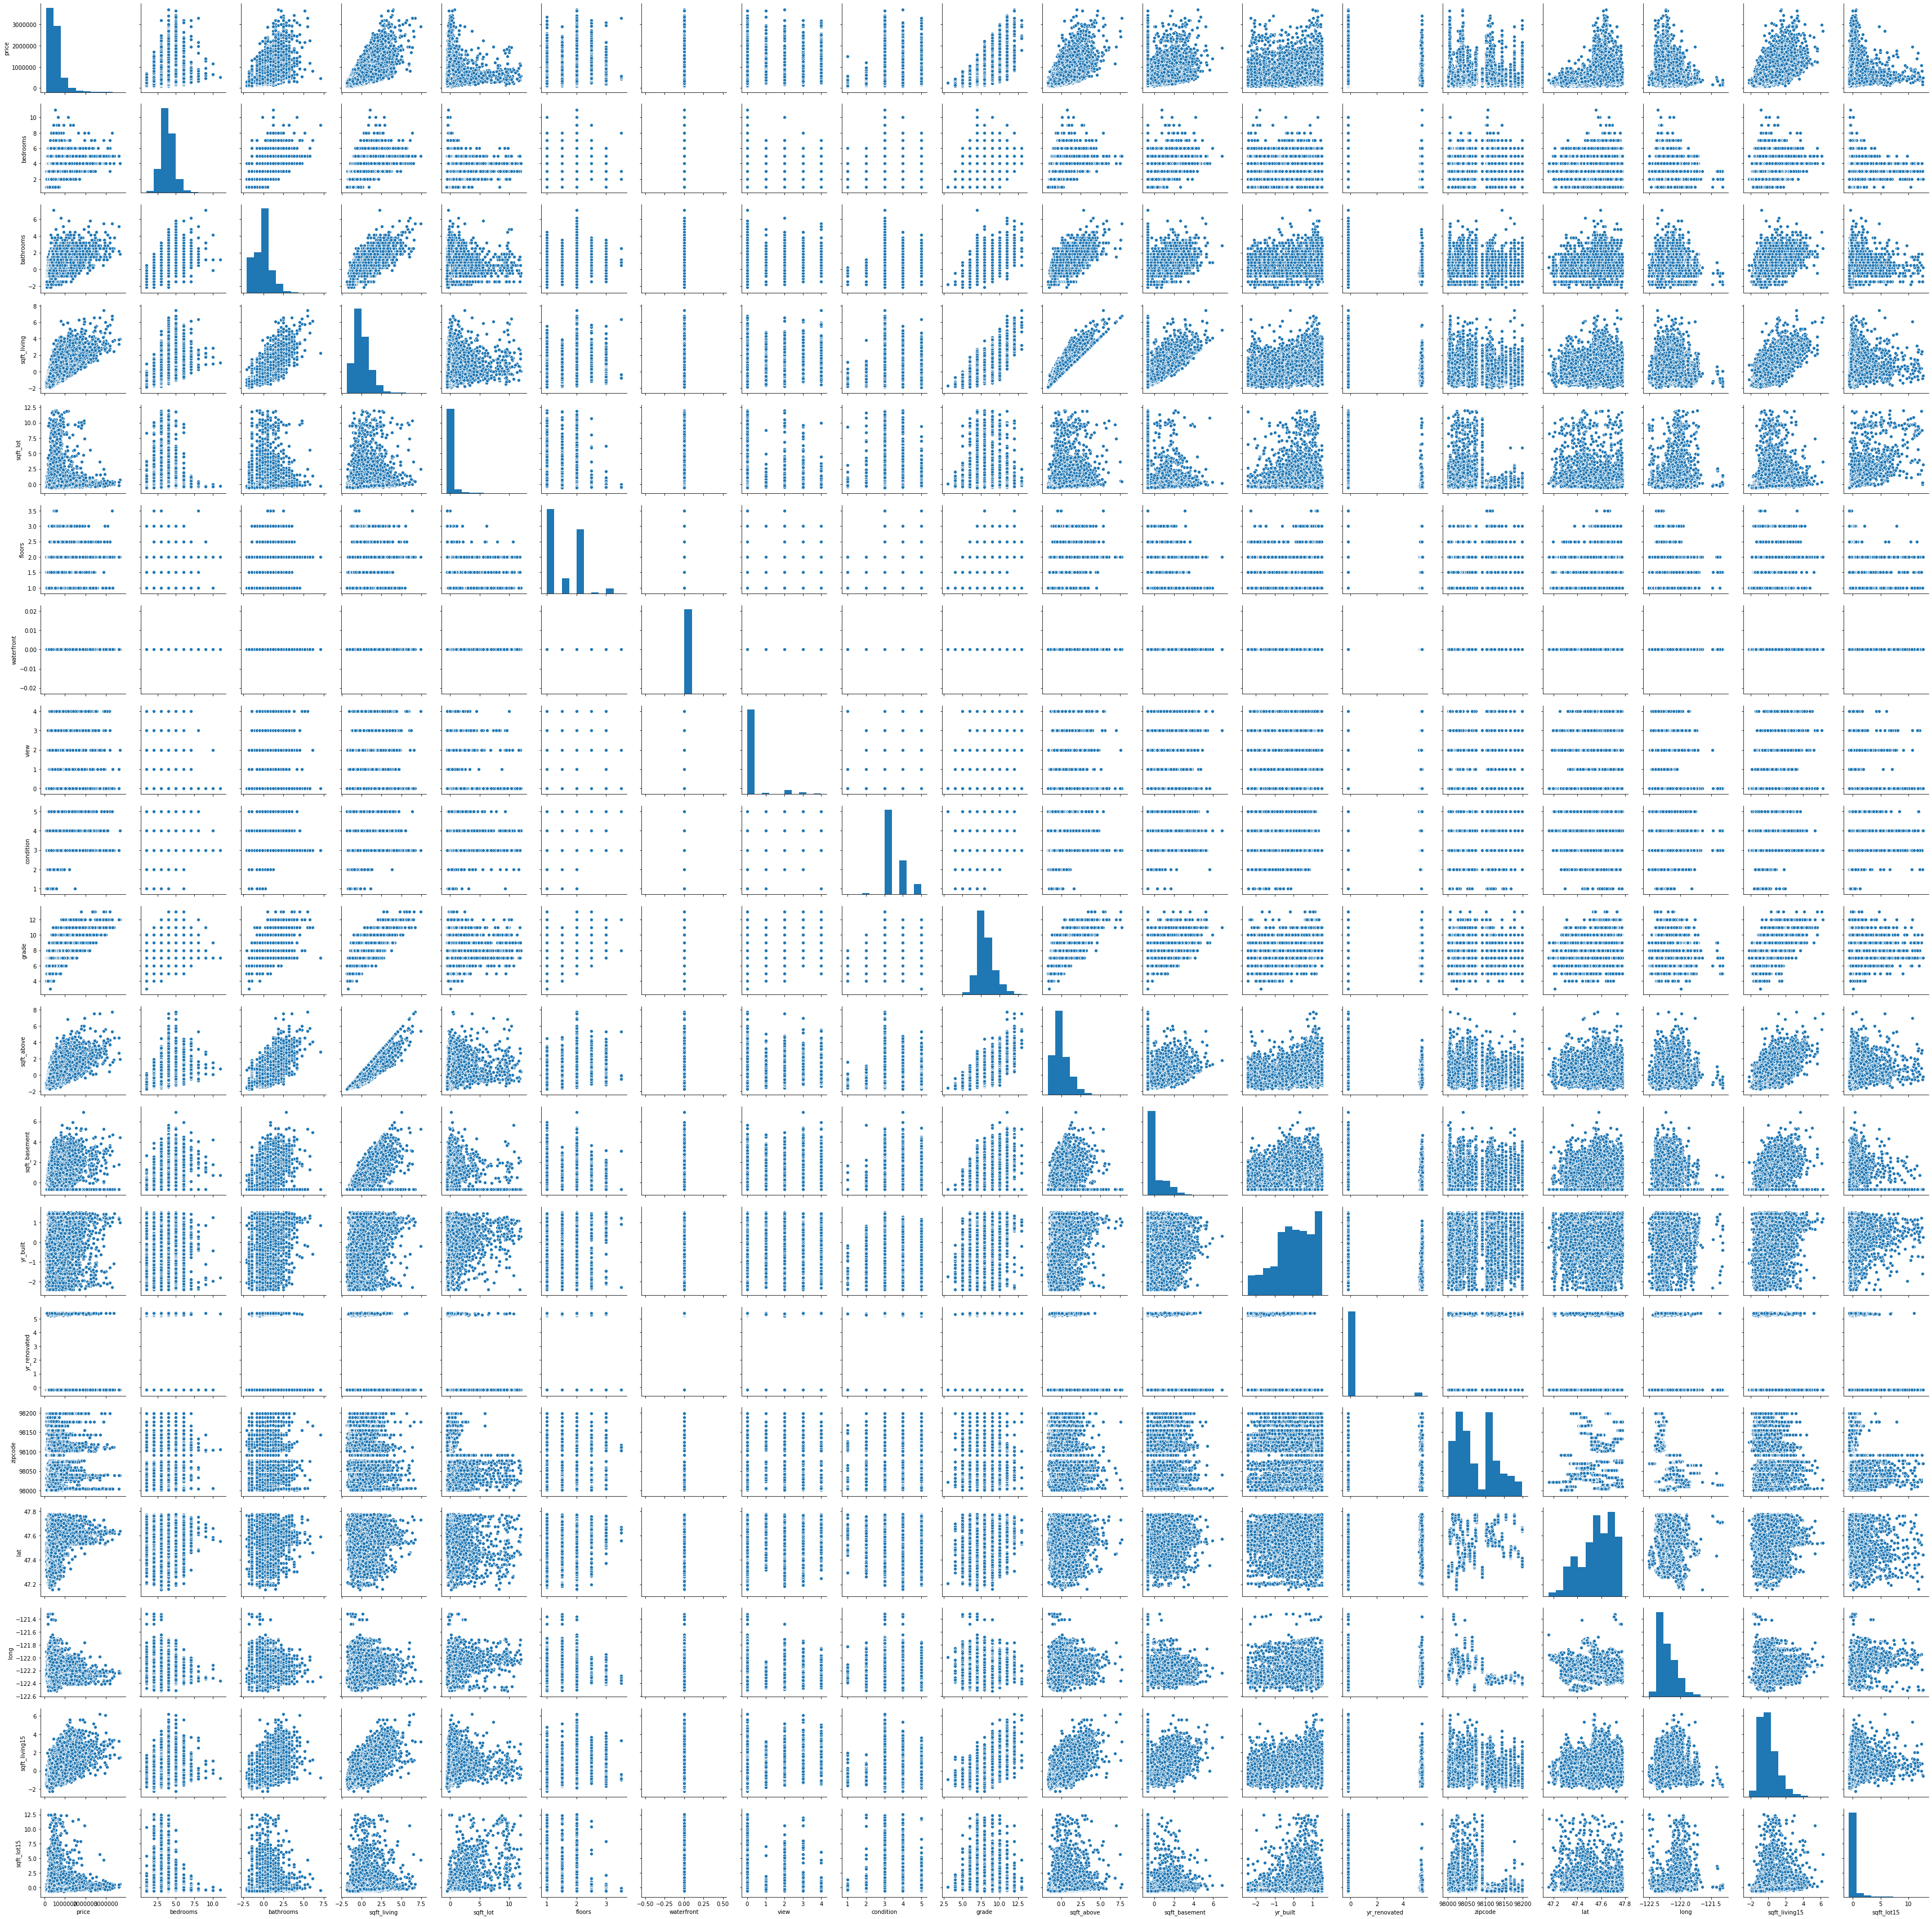

In [38]:
sns.pairplot(df)

## Check for Linearity

jointplots

## Check for Multicollinearity

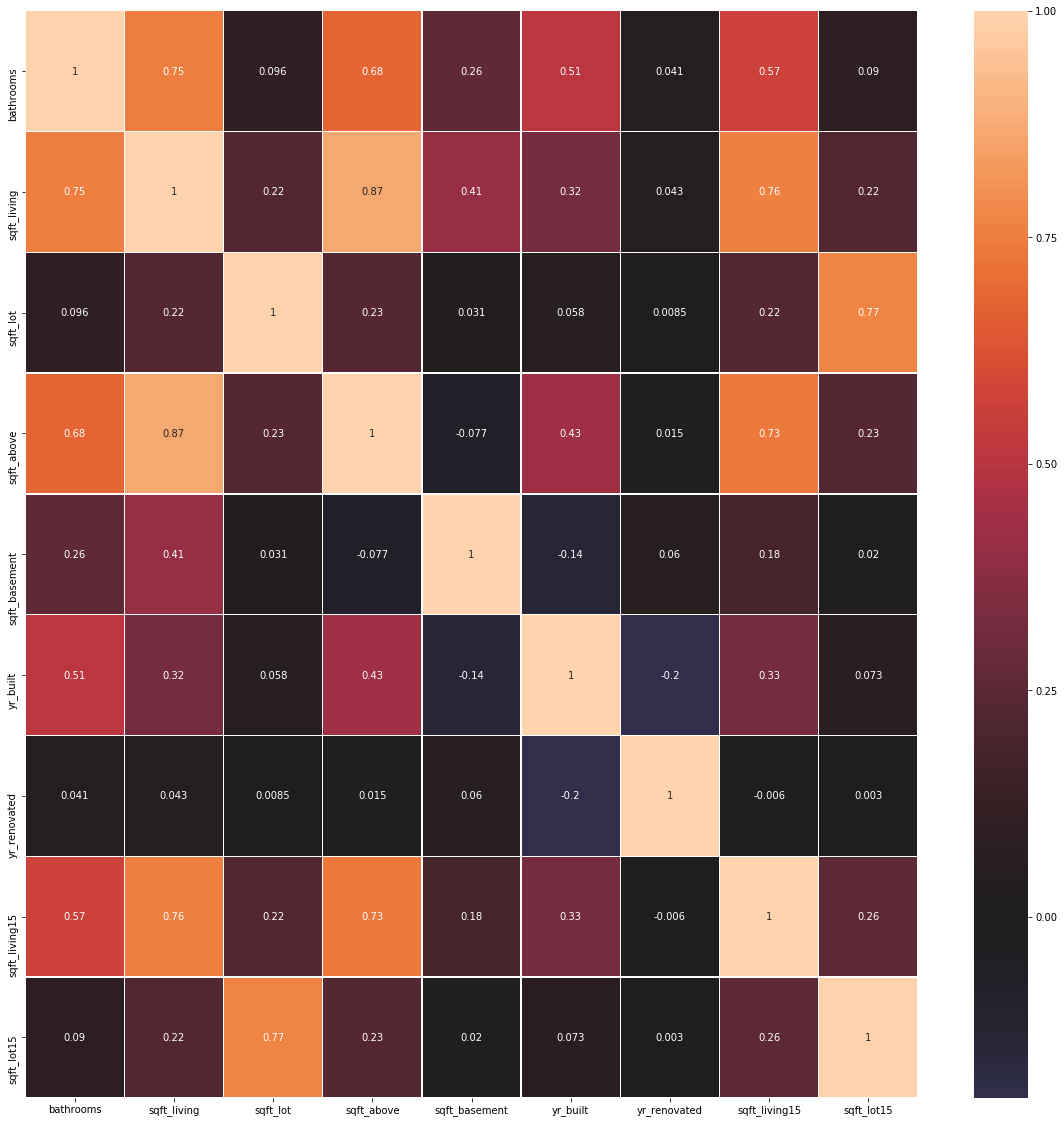

In [39]:
# df_target = df_no_outliers.loc['price']
df_heatmap=df.drop(['price','zipcode', 'lat', 'long'],axis=1)
plt.figure(figsize=(20,20))
ax=sns.heatmap(df_heatmap.corr(), center=0, linewidths=.5,annot=True);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [40]:
df_heatmap.corr() > 0.75


bathrooms  sqft_living  sqft_lot  sqft_above  sqft_basement  \
bathrooms           True        False     False       False          False   
sqft_living        False         True     False        True          False   
sqft_lot           False        False      True       False          False   
sqft_above         False         True     False        True          False   
sqft_basement      False        False     False       False           True   
yr_built           False        False     False       False          False   
yr_renovated       False        False     False       False          False   
sqft_living15      False         True     False       False          False   
sqft_lot15         False        False      True       False          False   

               yr_built  yr_renovated  sqft_living15  sqft_lot15  
bathrooms         False         False          False       False  
sqft_living       False         False           True       False  
sqft_lot          False         False          False        True  
sqft_above        False         False          False       False  
sqft_basement     False         False          False       False  
yr_built           True         False          False       False  
yr_renovated      False          True          False       False  
sqft_living15     False         False           True       False  
sqft_lot15        False         False          False        True

In [41]:
df_feats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21222 entries, 0 to 21596
Data columns (total 43 columns):
price            21222 non-null float64
bathrooms        21222 non-null float64
sqft_living      21222 non-null float64
sqft_lot         21222 non-null float64
sqft_above       21222 non-null float64
sqft_basement    21222 non-null float64
yr_built         21222 non-null float64
yr_renovated     21222 non-null float64
sqft_living15    21222 non-null float64
sqft_lot15       21222 non-null float64
bedrooms_2       21222 non-null uint8
bedrooms_3       21222 non-null uint8
bedrooms_4       21222 non-null uint8
bedrooms_5       21222 non-null uint8
bedrooms_6       21222 non-null uint8
bedrooms_7       21222 non-null uint8
bedrooms_8       21222 non-null uint8
bedrooms_9       21222 non-null uint8
bedrooms_10      21222 non-null uint8
bedrooms_11      21222 non-null uint8
floors_1.5       21222 non-null uint8
floors_2.0       21222 non-null uint8
floors_2.5       21222 non-null uin

In [42]:
# # df=df.drop(['sqft_living'], axis=1)
# df_feats=df_feats.drop(['sqft_living'], axis=1)
# df_feats=df_feats.drop(['sqft_living'], axis=1)

In [43]:
df_feats.columns

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'bedrooms_10',
       'bedrooms_11', 'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0',
       'floors_3.5', 'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0',
       'condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13'],
      dtype='object')

In [57]:
outcome = 'price'
x_cols = ['bathrooms', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'bedrooms_10',
       'bedrooms_11', 'floors_1_5', 'floors_2_0', 'floors_2_5', 'floors_3_0',
       'floors_3_5', 'view_1_0', 'view_2_0', 'view_3_0', 'view_4_0',
       'condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13']

In [58]:
# df_feats.columns = [col.replace('.', '_', inplace=True) for col in df_feats.columns]
# df_feats.columns = [col.replace(' ', '_', inplace=True) for col in df_feats.columns]
df_feats.columns = df_feats.columns.str.replace(r"[.]", "_")

In [59]:
df_feats.columns

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'bedrooms_10',
       'bedrooms_11', 'floors_1_5', 'floors_2_0', 'floors_2_5', 'floors_3_0',
       'floors_3_5', 'view_1_0', 'view_2_0', 'view_3_0', 'view_4_0',
       'condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13'],
      dtype='object')

In [60]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_feats).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     1028.
Date:                Tue, 21 Apr 2020   Prob (F-statistic):               0.00
Time:                        21:22:39   Log-Likelihood:            -2.8805e+05
No. Observations:               21222   AIC:                         5.762e+05
Df Residuals:                   21180   BIC:                         5.765e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.638e+05   1.94e+05      1.363      0.173   -1.16e+05    6.43e+05
bathrooms      3.786e+04   2387.138     15.861      0.000    3.32e+04    4.25e+04
sqft_lot      -4875.6184   2065.243     -2.361      0.018   -8923.652    -827.584
sqft_above      8.24e+04   3068.261     26.855      0.000    7.64e+04    8.84e+04
sqft_basement  5.164e+04   1842.853     28.023      0.000     4.8e+04    5.53e+04
yr_built      -9.078e+04   2077.588    -43.695      0.000   -9.49e+04   -8.67e+04
yr_renovated   9822.2602   1383.869      7.098      0.000    7109.771    1.25e+04
sqft_living15  3.244e+04   2264.498     14.325      0.000     2.8e+04    3.69e+04
sqft_lot15    -1.176e+04   2082.230     -5.647      0.000   -1.58e+04   -7677.246
bedrooms_2     8192.5717   1.47e+04      0.557      0.577   -2.06e+04     3.7e+04
bedrooms_3    -3.934e+04   1.47e+04     -2.682      0.007   -6.81e+04   -1.06e+04
bedrooms_4    -6.741e+04    1.5e+04     -4.501      0.000   -9.68e+04   -3.81e+04
bedrooms_5    -5.296e+04   1.58e+04     -3.349      0.001    -8.4e+04    -2.2e+04
bedrooms_6    -1.022e+05   1.93e+04     -5.288      0.000    -1.4e+05   -6.43e+04
bedrooms_7    -6.493e+04   3.51e+04     -1.850      0.064   -1.34e+05    3860.670
bedrooms_8     1.158e+05   5.54e+04      2.089      0.037    7167.483    2.24e+05
bedrooms_9    -1.902e+05   7.96e+04     -2.389      0.017   -3.46e+05   -3.41e+04
bedrooms_10   -5.939e+04   1.11e+05     -0.535      0.592   -2.77e+05    1.58e+05
bedrooms_11    -3.01e+05   1.91e+05     -1.577      0.115   -6.75e+05     7.3e+04
floors_1_5      1.66e+04   5222.878      3.178      0.001    6362.788    2.68e+04
floors_2_0     1.632e+04   4243.478      3.846      0.000    8004.775    2.46e+04
floors_2_5     1.381e+05    1.6e+04      8.638      0.000    1.07e+05    1.69e+05
floors_3_0     1.382e+05   8953.249     15.439      0.000    1.21e+05    1.56e+05
floors_3_5     2.013e+05   7.25e+04      2.779      0.005    5.93e+04    3.43e+05
view_1_0       1.159e+05   1.07e+04     10.816      0.000    9.49e+04    1.37e+05
view_2_0       5.323e+04   6587.509      8.080      0.000    4.03e+04    6.61e+04
view_3_0        1.14e+05   9208.245     12.380      0.000    9.59e+04    1.32e+05
view_4_0       2.459e+05   1.44e+04     17.115      0.000    2.18e+05    2.74e+05
condition_2    1.473e+04    3.9e+04      0.378      0.705   -6.17e+04    9.11e+04
condition_3    4.242e+04   3.63e+04      1.169      0.242   -2.87e+04    1.14e+05
condition_4    6.234e+04   3.63e+04      1.718      0.086   -8785.081    1.33e+05
condition_5    1.043e+05   3.65e+04      2.857      0.004    3.27e+04    1.76e+05
grade_4        1.347e+04   1.94e+05      0.069      0.945   -3.66e+05    3.93e+05
grade_5        1.928e+04   1.91e+05      0.101      0.920   -3.55e+05    3.93e+05
grade_6        7.018e+04   1.91e+05      0.368   

In [ ]:
outlier uyguladim
sqft_living attim

## notes


basement to new feature



subsampling

regularisation 



future work:  garaj, pool, okul gradeleri

## web sites
hexbins with longitude and latitude 
https://medium.com/@mattheweparker/visualizing-data-with-hexbins-in-python-39823f89525e  

categorigal data 
https://medium.com/@rabinpoudyal1995/encoding-categorical-data-in-python-fab150d6e21b

All houses are sold within 390 days, therefore I will not need to adjust the price.
https://github.com/Burton-David/KingsCountyHousingLR/blob/master/student.ipynb




https://www.incomebyzipcode.com/washington/98109

https://medium.com/@allisonkelly42/exploratory-data-analysis-with-the-king-county-housing-data-c6d3f7eadc57